In [1]:
!pip install dynet
!git clone https://github.com/neubig/nn4nlp-code.git

    100% |████████████████████████████████| 27.6MB 275kB/s 
    100% |████████████████████████████████| 3.3MB 2.5MB/s 
fatal: destination path 'nn4nlp-code' already exists and is not an empty directory.


In [7]:
!ls

datalab  embeddings.txt  labels.txt  nn4nlp-code


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import argparse
# from tsne import tsne # from http://lvdmaaten.github.io/tsne/

In [0]:
from sklearn.manifold import TSNE

In [0]:
#read the datafile, with the option for a seperate labels file
def read_data(vector_file_path, labels_file_path=None):
  vocab = []
  word_vectors = []

  with open(labels_file_path) as sample_file:
    for line in sample_file:
      vocab.append(line.strip())
  with open(vector_file_path) as vector_file:
    for line in vector_file:
      line = line.strip()
      word_vector = line.split()
      word_vectors.append([float(i) for i in word_vector])
  return np.array(word_vectors), vocab

def display_data(word_vectors, words, target_words=None):
  target_matrix = word_vectors.copy()
  if target_words:
    target_words = [line.strip().lower() for line in open(target_words)][:2000]
    rows = [words.index(word) for word in target_words if word in words]
    target_matrix = target_matrix[rows,:]
  else:
    rows = np.random.choice(len(word_vectors), size=1000, replace=False)
    target_matrix = target_matrix[rows,:]
  reduced_matrix = TSNE(2).fit_transform(target_matrix)
#   reduced_matrix = tsne(target_matrix, 2);

#   plt.figure(figsize=(200, 200), dpi=100)
  plt.figure(figsize=(20, 20))
  max_x = np.amax(reduced_matrix, axis=0)[0]
  max_y = np.amax(reduced_matrix, axis=0)[1]
  plt.xlim((-max_x,max_x))
  plt.ylim((-max_y,max_y))

  plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20);

  for row_id in range(0, len(rows)):
    target_word = words[rows[row_id]]
    x = reduced_matrix[row_id, 0]
    y = reduced_matrix[row_id, 1]
    plt.annotate(target_word, (x,y))
  plt.show()
#   plt.savefig("word_vectors.png");

In [0]:
vector_file = "embeddings.txt"
label_file = "labels.txt"
target_words = None

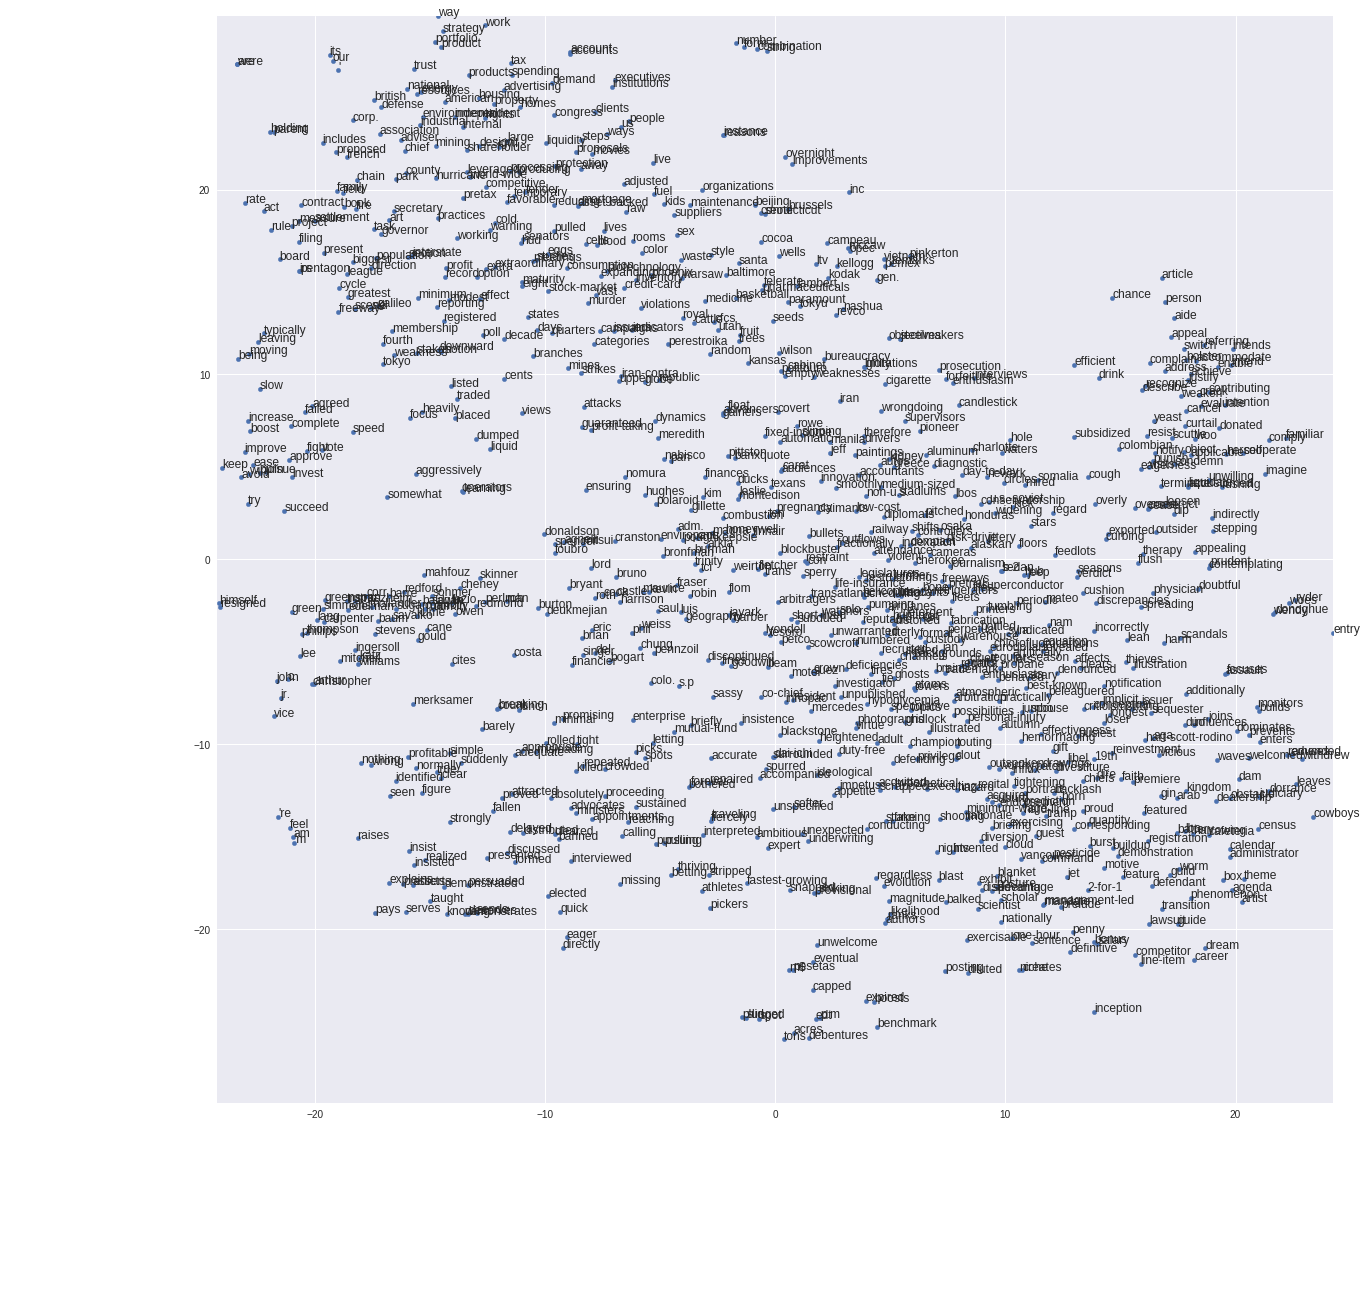

In [24]:
X, labels = read_data(vector_file, label_file)
display_data(X, labels, target_words)